# Task1

In [1]:
import pandas as pd

In [2]:
#d = pd.read_csv('11.csv',dtype={'ID':'str','householdID':'str'},index_col=0)
d = pd.read_csv('11.csv',index_col=0)

In [3]:
d.walktime.isna().value_counts()

True     5776
False    4361
Name: walktime, dtype: int64

In [4]:
d.cysc.isna().value_counts()

False    7592
True     2545
Name: cysc, dtype: int64

In [5]:
d.age.isna().value_counts()

False    10125
True        12
Name: age, dtype: int64

In [6]:
ID = ['ID','householdID']
bio = ['sysbp','diabp','pulse','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb','cysc']
chronic = ['hibpe','diabe','cancre','lunge','hearte','stroke','psyche','arthre','dyslipe','livere','kidneye','digeste','asthmae','memrye']
limit = ['dressa','batha','eata','beda','toilta','urina','moneya','medsa','shopa','mealsa','housewka','joga','walk1kma','walk100a','chaira','climsa','stoopa','lifta','dimea','armsa']
cd = ['cesd10','shlta','slfmem','imrc','dlrc','ser7','orient','draw']

In [7]:
d = d[(d.age >= 40) &(d.age <= 85)]

df = d[ID+bio+chronic+limit+cd+['age']]
df = df.dropna(subset=['age'])

In [8]:
df.shape

(10027, 64)

In [9]:
df.columns

Index(['ID', 'householdID', 'sysbp', 'diabp', 'pulse', 'wbc', 'mcv', 'plt',
       'bun', 'glu', 'crea', 'cho', 'tg', 'hdl', 'ldl', 'crp', 'hbalc', 'ua',
       'htc', 'hgb', 'cysc', 'hibpe', 'diabe', 'cancre', 'lunge', 'hearte',
       'stroke', 'psyche', 'arthre', 'dyslipe', 'livere', 'kidneye', 'digeste',
       'asthmae', 'memrye', 'dressa', 'batha', 'eata', 'beda', 'toilta',
       'urina', 'moneya', 'medsa', 'shopa', 'mealsa', 'housewka', 'joga',
       'walk1kma', 'walk100a', 'chaira', 'climsa', 'stoopa', 'lifta', 'dimea',
       'armsa', 'cesd10', 'shlta', 'slfmem', 'imrc', 'dlrc', 'ser7', 'orient',
       'draw', 'age'],
      dtype='object')

In [10]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title='d11_stat')
#profile.to_file('d11_stat.html')

In [11]:
m1 = {'1.Very good':'Very good','2.Good':'Good','3.Fair':'Fair','4.Poor':'Poor','5.Very Poor':'Very Poor'}
m2 = {'1.Excellent':'Excellent','2.Very Good':'Very Good','3.Good':'Good','4.Fair':'Fair','5.Poor':'Poor'}

df['shlta'] = df.shlta.map(m1)
df['slfmem'] = df.slfmem.map(m2)

In [12]:
from pycaret.regression import *
reg = setup(df,target='age',ignore_features=['ID','householdID'],numeric_features=['ser7','orient','imrc','dlrc'],ordinal_features = { 'shlta' : ['Very Poor','Poor','Fair','Good','Very good']
                                                ,'slfmem' : ['Poor','Fair','Good','Very Good','Excellent']}
                                                ,normalize_method = 'minmax'
                                                ,normalize=True
                                                ,ignore_low_variance=True,remove_multicollinearity=True
                                                ,session_id=123)

,Description,Value
0,session_id,123
1,Target,age
2,Original Data,"(10027, 64)"
3,Missing Values,True
4,Numeric Features,24
5,Categorical Features,37
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7018, 77)"


In [13]:
best_task1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.6452,49.5272,7.0337,0.4350,0.1176,0.0976,3.7650
lightgbm,Light Gradient Boosting Machine,5.7030,50.0914,7.0729,0.4286,0.1181,0.0985,0.1020
gbr,Gradient Boosting Regressor,5.7360,50.2633,7.0856,0.4266,0.1184,0.0992,0.6060
rf,Random Forest Regressor,5.8732,52.3854,7.2327,0.4030,0.1206,0.1016,1.7210
br,Bayesian Ridge,5.8900,53.3070,7.2960,0.3927,0.1214,0.1016,0.0240
ridge,Ridge Regression,5.8876,53.3481,7.2989,0.3922,0.1215,0.1015,0.0230
lr,Linear Regression,5.8968,53.5733,7.3149,0.3893,0.1217,0.1017,0.3140
huber,Huber Regressor,5.8772,53.6240,7.3178,0.3890,0.1216,0.1010,0.1270
lar,Least Angle Regression,5.9299,54.2474,7.3607,0.3818,0.1226,0.1023,0.0230
et,Extra Trees Regressor,5.9567,54.3239,7.3652,0.3812,0.1228,0.1030,1.2200


In [14]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.7399,50.2367,7.0878,0.4507,0.1185,0.0994
1,5.4175,43.8818,6.6243,0.4664,0.1121,0.0949
2,5.5096,47.7577,6.9107,0.4574,0.1155,0.0955
3,5.9280,54.6124,7.3900,0.4003,0.1231,0.1026
4,5.5992,49.5006,7.0357,0.4277,0.1182,0.0980
5,5.7214,51.9576,7.2082,0.4426,0.1200,0.0979
6,5.5175,46.6914,6.8331,0.4176,0.1152,0.0961
7,5.8674,53.4048,7.3079,0.4267,0.1220,0.1010
8,5.7392,51.2141,7.1564,0.4844,0.1182,0.0974
9,5.4126,46.0154,6.7835,0.3756,0.1132,0.0932


In [15]:
from pycaret.regression import tune_model

In [16]:
help(tune_model)

Help on function tune_model in module pycaret.regression:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'R2', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = False, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, **kwargs)
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected 
    model based on ``optimize`` parameter. Metrics evaluated during CV can be 
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function

In [18]:
tune_cat = tune_model(cat,search_library='optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8098,50.6546,7.1172,0.4461,0.1190,0.1007
1,5.3963,43.7892,6.6173,0.4676,0.1119,0.0945
2,5.6417,49.2582,7.0184,0.4404,0.1169,0.0976
3,5.9011,53.9018,7.3418,0.4081,0.1222,0.1021
4,5.6791,50.1353,7.0806,0.4204,0.1188,0.0991
5,5.7029,51.4933,7.1759,0.4476,0.1191,0.0973
6,5.5790,47.2735,6.8756,0.4104,0.1156,0.0969
7,5.9008,52.9225,7.2748,0.4319,0.1212,0.1016
8,5.7378,51.0118,7.1423,0.4865,0.1176,0.0971
9,5.3101,44.2727,6.6538,0.3993,0.1110,0.0914


In [33]:
#save_model(cat, 'task1_inclued_cysc')
#cat_saved = load_model('cat_exclued_cysc&walktime')

Transformation Pipeline and Model Succesfully Saved


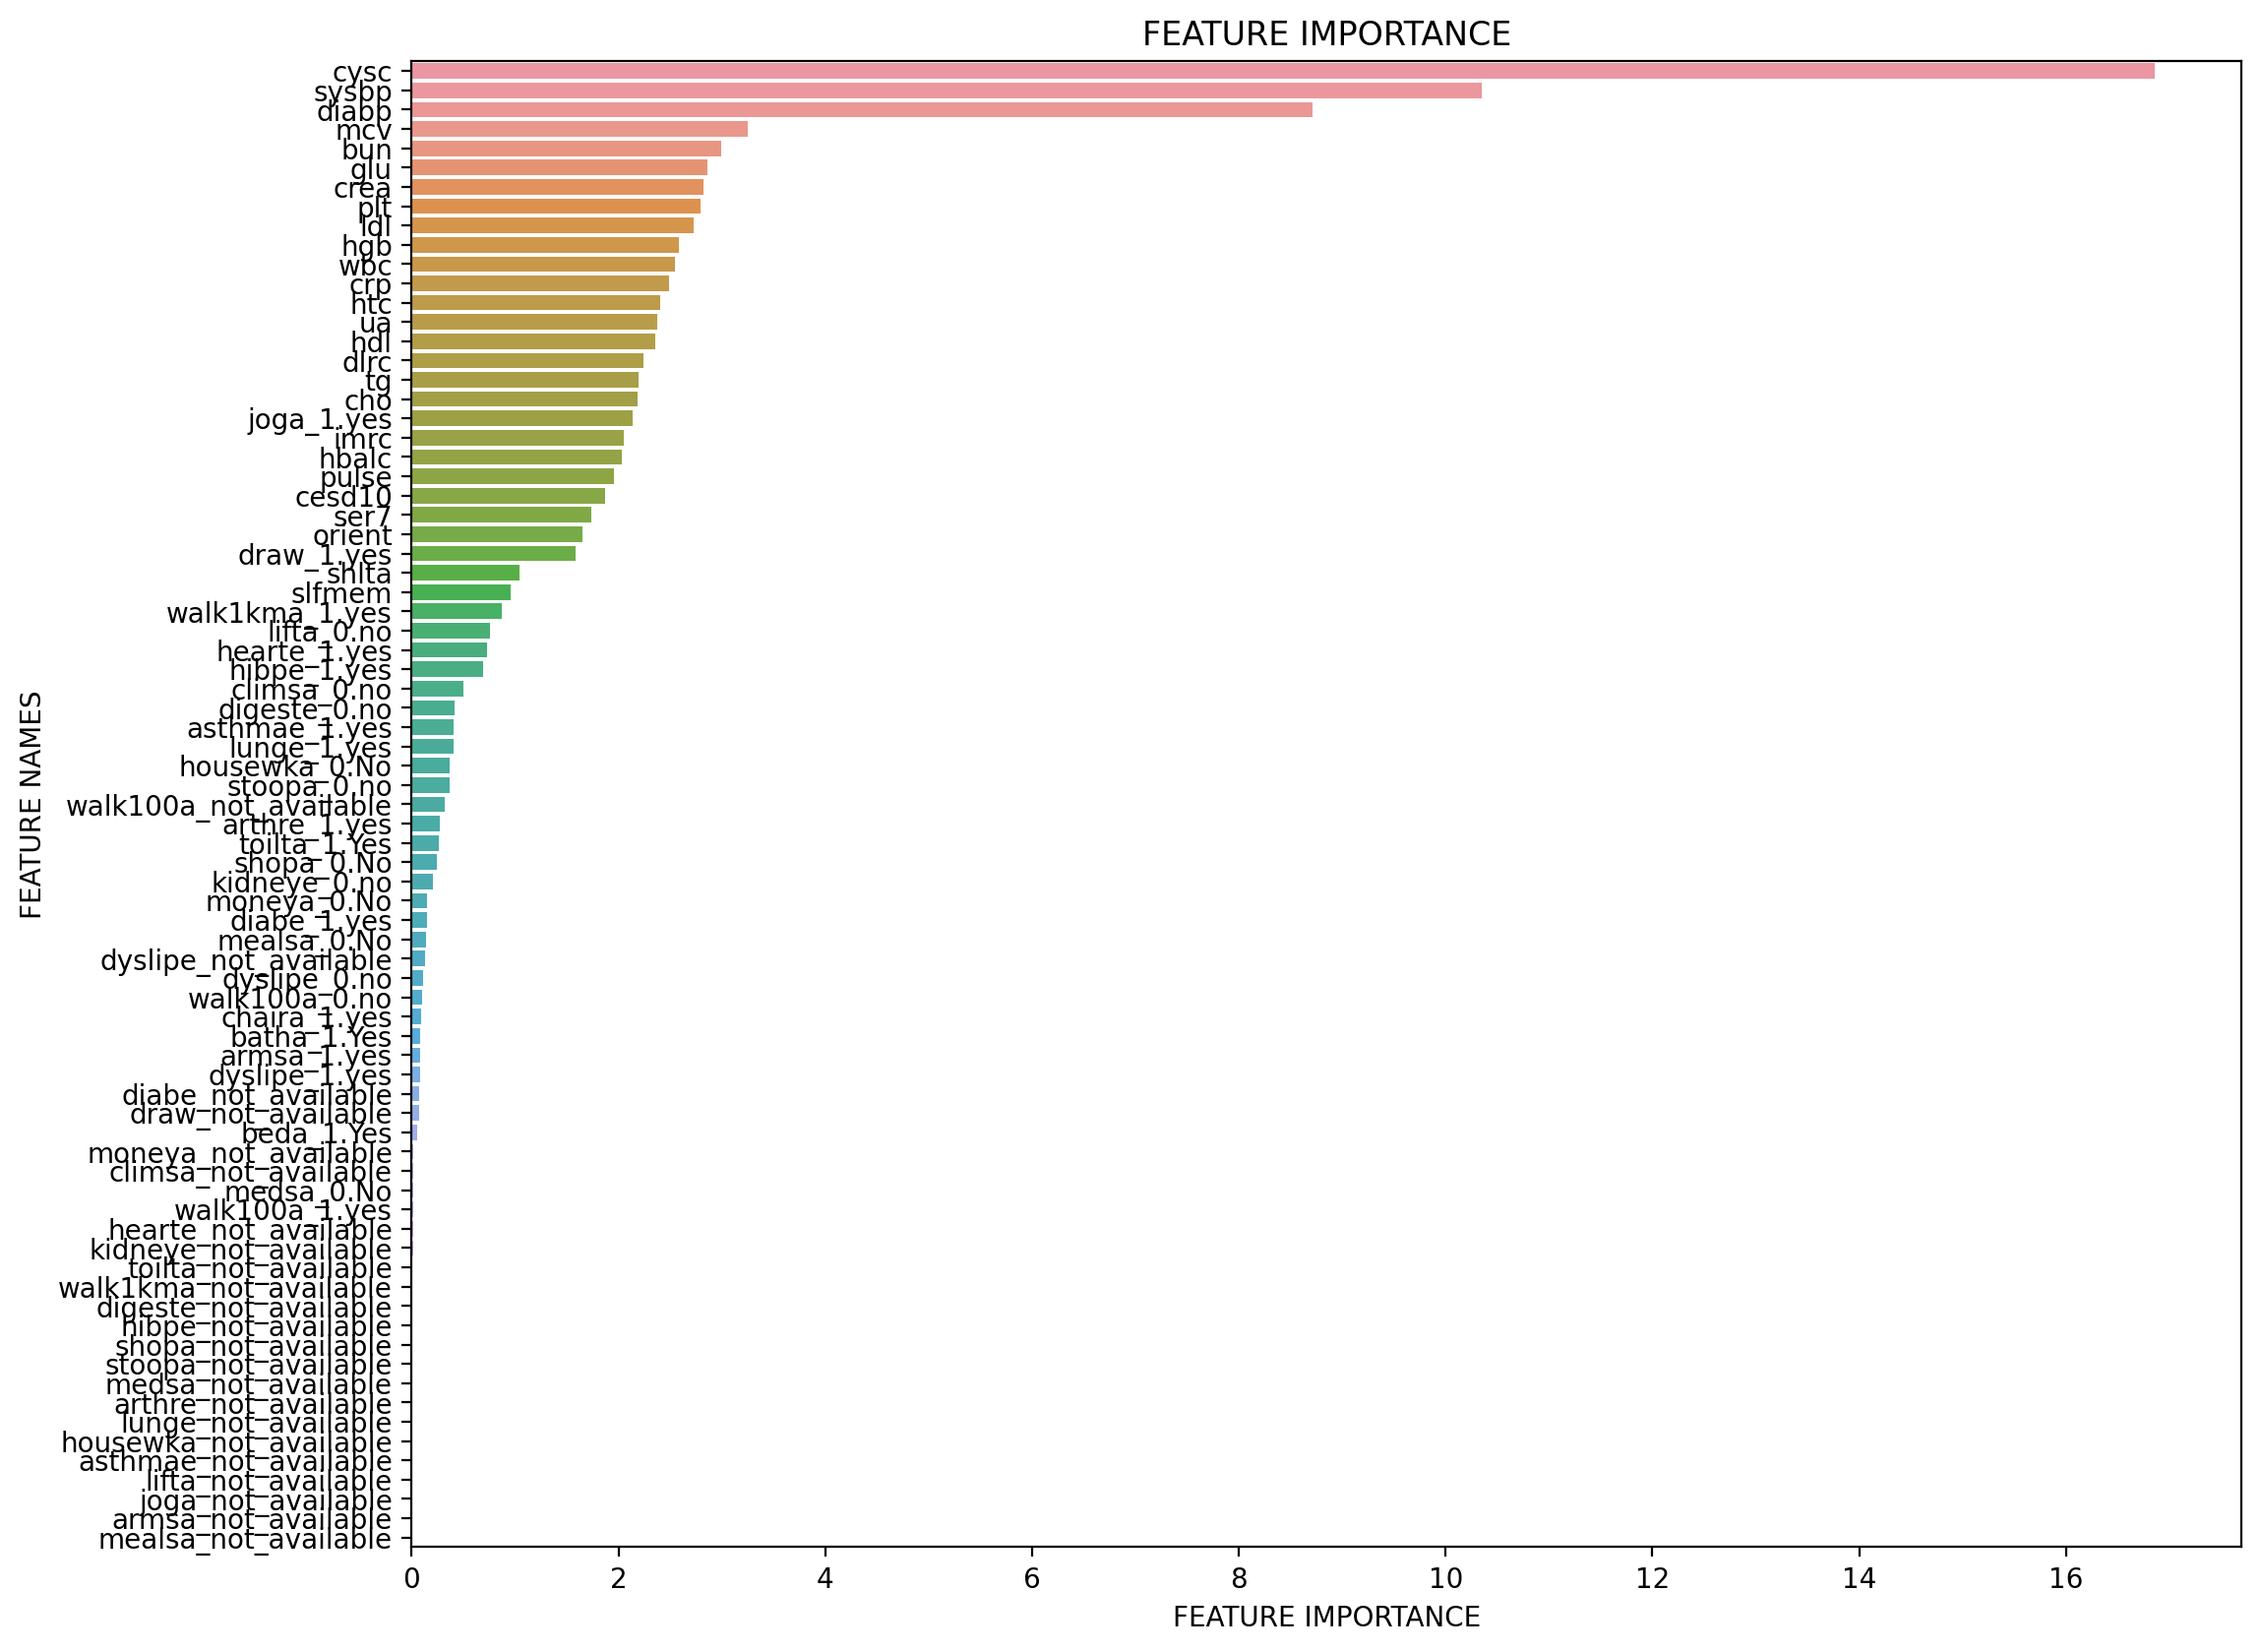

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(12,10),dpi=200)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(best_task1.feature_importances_,best_task1.feature_names_,'')

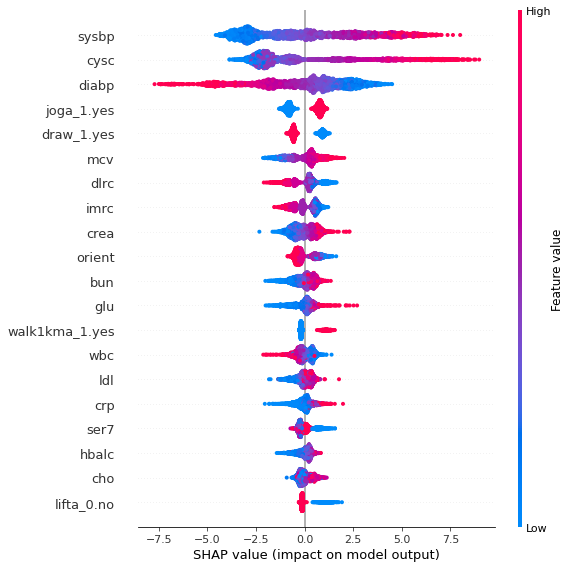

In [16]:
interpret_model(best_task1)

In [28]:
#pred = predict_model(cat,data=df)
#pred['res']= pred['Label']-pred['age']
#pred['five'] = pred.res.apply(lambda x: 1 if abs(x) <=5 else 0)
#pred['ten'] = pred.res.apply(lambda x: 1 if abs(x) <=10 else 0)

#pred = pred.reset_index(drop=True)
#pred

In [1]:
bio = ['sysbp','diabp','pulse','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb','cysc']
chronic = ['hibpe','diabe','cancre','lunge','hearte','stroke','psyche','arthre','dyslipe','livere','kidneye','digeste','asthmae','memrye']
limit = ['dressa','batha','eata','beda','toilta','urina','moneya','medsa','shopa','mealsa','housewka','joga','walk1kma','walk100a','chaira','climsa','stoopa','lifta','dimea','armsa']
cd = ['cesd10','shlta','slfmem','imrc','dlrc','ser7','orient','draw']

In [18]:
#model = load_model('Task_report&Predict_result/2011_task1_training_model')

ID = ['ID','householdID']
bio = ['sysbp','diabp','pulse','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb','cysc']
chronic = ['hibpe','diabe','cancre','lunge','hearte','stroke','psyche','arthre','dyslipe','livere','kidneye','digeste','asthmae','memrye']
limit = ['dressa','batha','eata','beda','toilta','urina','moneya','medsa','shopa','mealsa','housewka','joga','walk1kma','walk100a','chaira','climsa','stoopa','lifta','dimea','armsa']
cd = ['cesd10','shlta','slfmem','imrc','dlrc','ser7','orient','draw']

d3 = pd.read_stata('2015.dta')

d3 = d3[(d3.age >= 40) &(d3.age <= 85)]

d4 = d3[ID+bio+chronic+limit+cd+['age']]
df_2015 = d4.dropna(subset=['age'])

pred = predict_model(best_task1,data=df_2015)#data = df_2015

pred['res']= pred['Label']-pred['age']
pred['five'] = pred.res.apply(lambda x: 1 if abs(x) <=5 else 0)
pred['ten'] = pred.res.apply(lambda x: 1 if abs(x) <=10 else 0)

pred = pred.reset_index(drop=True)
pred

,ID,householdID,sysbp,diabp,pulse,wbc,mcv,plt,bun,glu,...,imrc,dlrc,ser7,orient,draw,age,Label,res,five,ten
0,010104101001,0101041010,108.666664,66.666664,63.333332,5.6,98.6,156.0,15.686272,91.891891,...,6.0,5.0,5.0,3.0,0.no,50.250000,54.3197,4.069700,1,1
1,010104101002,0101041010,142.666672,64.666664,52.333332,8.3,84.3,175.0,17.086832,91.891891,...,4.0,3.0,5.0,2.0,0.no,52.250000,66.0735,13.823500,0,0
2,010104102001,0101041020,124.666664,70.000000,69.666664,7.9,101.7,160.0,22.408960,86.486488,...,5.0,2.0,0.0,0.0,0.no,60.666668,59.1138,-1.552868,1,1
3,010104102002,0101041020,152.666672,85.666664,71.333336,7.4,102.7,142.0,17.366943,81.081078,...,5.0,2.0,5.0,2.0,0.no,63.916668,61.4899,-2.426768,1,1
4,010104103001,0101041030,176.000000,95.000000,72.666664,7.0,102.5,167.0,17.647057,95.495499,...,4.0,6.0,5.0,3.0,1.yes,51.750000,54.6438,2.893800,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,347763221001,3477632210,144.333328,71.333336,67.333336,8.8,91.5,220.0,14.005600,90.090088,...,3.0,2.0,5.0,4.0,1.yes,59.916668,61.0492,1.132532,1,1
9664,347763221002,3477632210,116.666664,72.000000,63.666668,5.9,91.6,224.0,10.924368,86.486488,...,3.0,3.0,5.0,2.0,0.no,52.416668,53.8711,1.454432,1,1
9665,347763303001,3477633030,146.333328,98.000000,79.000000,4.8,102.2,161.0,15.406160,100.900902,...,0.0,0.0,1.0,1.0,0.no,60.750000,59.5218,-1.228200,1,1
9666,347763312001,3477633120,123.333336,77.333336,61.333332,3.6,89.4,201.0,12.605040,109.909912,...,4.0,3.0,1.0,4.0,1.yes,52.333332,50.8182,-1.515132,1,1


In [19]:
#pred.to_stata('task1_2015_include_cysc.dta',write_index=False)

In [20]:
#a = pd.read_stata('task1_2015_include_cysc.dta')
#a

,ID,householdID,sysbp,diabp,pulse,wbc,mcv,plt,bun,glu,...,imrc,dlrc,ser7,orient,draw,age,Label,res,five,ten
0,010104101001,0101041010,108.666664,66.666664,63.333332,5.6,98.6,156.0,15.686272,91.891891,...,6.0,5.0,5.0,3.0,0.no,50.250000,54.3197,4.069700,1,1
1,010104101002,0101041010,142.666672,64.666664,52.333332,8.3,84.3,175.0,17.086832,91.891891,...,4.0,3.0,5.0,2.0,0.no,52.250000,66.0735,13.823500,0,0
2,010104102001,0101041020,124.666664,70.000000,69.666664,7.9,101.7,160.0,22.408960,86.486488,...,5.0,2.0,0.0,0.0,0.no,60.666668,59.1138,-1.552868,1,1
3,010104102002,0101041020,152.666672,85.666664,71.333336,7.4,102.7,142.0,17.366943,81.081078,...,5.0,2.0,5.0,2.0,0.no,63.916668,61.4899,-2.426768,1,1
4,010104103001,0101041030,176.000000,95.000000,72.666664,7.0,102.5,167.0,17.647057,95.495499,...,4.0,6.0,5.0,3.0,1.yes,51.750000,54.6438,2.893800,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,347763221001,3477632210,144.333328,71.333336,67.333336,8.8,91.5,220.0,14.005600,90.090088,...,3.0,2.0,5.0,4.0,1.yes,59.916668,61.0492,1.132532,1,1
9664,347763221002,3477632210,116.666664,72.000000,63.666668,5.9,91.6,224.0,10.924368,86.486488,...,3.0,3.0,5.0,2.0,0.no,52.416668,53.8711,1.454432,1,1
9665,347763303001,3477633030,146.333328,98.000000,79.000000,4.8,102.2,161.0,15.406160,100.900902,...,0.0,0.0,1.0,1.0,0.no,60.750000,59.5218,-1.228200,1,1
9666,347763312001,3477633120,123.333336,77.333336,61.333332,3.6,89.4,201.0,12.605040,109.909912,...,4.0,3.0,1.0,4.0,1.yes,52.333332,50.8182,-1.515132,1,1


# Task2

In [21]:
import pandas as pd

In [22]:
#d = pd.read_csv('11.csv',dtype={'ID':'str','householdID':'str'},index_col=0)
d = pd.read_csv('11.csv',dtype={'ID':'str','householdID':'str'},index_col=0)

In [23]:
d.head()

,ID,householdID,sysbp,diabp,pulse,peakflow,grip,walktime,bloodweight,qc1_va003,...,dlrc,ser7,orient,draw,tr20,birth,birthm,iyear,imonth,age
0,10104101002,101041010,123.666664,67.333336,55.333332,200.00000,43.0,NaN,32381.557,1.0,...,7.0,5.0,4.0,0.no,17.0,1963.0,5.0,2011,7,48.166668
1,10104102002,101041020,143.333330,74.666664,67.666664,236.66667,35.0,5.300,31800.947,1.0,...,2.0,2.0,2.0,0.no,6.0,1951.0,9.0,2011,8,59.916668
2,10104104001,101041040,178.666670,87.000000,55.000000,176.66667,30.0,4.015,31795.684,1.0,...,6.0,2.0,3.0,0.no,12.0,1950.0,9.0,2011,7,60.833332
3,10104105002,101041050,191.000000,106.333336,58.333332,560.00000,48.0,5.250,31711.080,1.0,...,7.0,5.0,3.0,0.no,13.0,1943.0,12.0,2011,8,67.666664
4,10104107001,101041070,118.333336,54.000000,53.666668,173.33333,30.0,4.700,63400.380,1.0,...,6.0,4.0,3.0,0.no,10.0,1932.0,3.0,2011,7,79.333336


In [24]:
d1 = pd.read_stata('CHARLS_Age_Prediction_2011_Master_age.dta')

In [25]:
d1.qc1_vb004

0        20.200001
1        17.400000
2        14.900000
3        16.100000
4        14.600000
           ...    
10132    17.500000
10133    13.600000
10134    15.900000
10135    16.100000
10136    17.700001
Name: qc1_vb004, Length: 10137, dtype: float32

In [26]:
d.hgb

0        20.2
1        17.4
2        14.9
3        16.1
4        14.6
         ... 
10132    17.5
10133    13.6
10134    15.9
10135    16.1
10136    17.7
Name: hgb, Length: 10137, dtype: float64

In [27]:
feature = ['ID','householdID','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb','cysc']

In [28]:
d = d[(d.age >= 40) &(d.age <= 85)]
df = d[feature+['age']]
df = df.dropna(subset=['age'])

In [29]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title='d11_stat_task2')
#profile.to_file('d11_stat_task2.html')

In [30]:
df.shape

(10027, 19)

In [31]:
from pycaret.regression import *
reg = setup(df,target='age',ignore_features=['ID','householdID']
                           ,normalize_method = 'minmax'
                           ,normalize=True
                           ,ignore_low_variance=True,remove_multicollinearity=True
                           ,session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10027, 19)"
4,Missing Values,True
5,Numeric Features,17
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [32]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,6.5186,64.1274,8.0011,0.2697,0.1329,0.1125,1.6547
1,Light Gradient Boosting Machine,6.5316,64.8746,8.0492,0.2605,0.1337,0.1128,0.1753
2,CatBoost Regressor,6.5265,65.1209,8.0634,0.2578,0.1340,0.1127,4.9789
3,Random Forest,6.5571,65.1260,8.0647,0.2577,0.1341,0.1134,1.4411
4,Extra Trees Regressor,6.5763,65.3299,8.0754,0.2563,0.1342,0.1137,0.7278
5,Support Vector Machine,6.6546,68.1411,8.2475,0.2239,0.1364,0.1138,1.8423
6,AdaBoost Regressor,6.8768,68.8044,8.2886,0.2166,0.1391,0.1211,0.4617
7,Bayesian Ridge,6.7705,69.6444,8.3367,0.2076,0.1382,0.1167,0.0122
8,Ridge Regression,6.7699,69.6441,8.3367,0.2076,0.1382,0.1167,0.0058
9,Linear Regression,6.7690,69.6482,8.3370,0.2075,0.1382,0.1167,0.0067


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
cat_task2 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.5659,65.0941,8.0681,0.2882,0.1340,0.1135
1,6.0589,55.6516,7.4600,0.3233,0.1257,0.1063
2,6.5045,65.0995,8.0684,0.2604,0.1336,0.1123
3,6.8733,70.9763,8.4247,0.2206,0.1394,0.1184
4,6.2092,60.5523,7.7815,0.2999,0.1299,0.1084
5,6.6492,68.7720,8.2929,0.2622,0.1372,0.1136
6,6.4513,62.7518,7.9216,0.2173,0.1332,0.1130
7,6.8566,69.2580,8.3221,0.2565,0.1378,0.1177
8,6.9240,72.8160,8.5332,0.2670,0.1399,0.1174
9,6.1717,60.2378,7.7613,0.1826,0.1292,0.1061


In [65]:
#save_model(cat_task2, 'task2_include_cysc')

Transformation Pipeline and Model Succesfully Saved


In [36]:
#model = load_model('Task_report&Predict_result/2011_task2_training_model')

d3 = pd.read_stata('2011.dta')

d3 = d3[(d3.age >= 40) &(d3.age <= 85)]

d4 = d3[feature+['age']]
df_2015_numeric = d4.dropna(subset=['age'])

pred = predict_model(cat_task2,data=df_2015_numeric)

pred['res']= pred['Label']-pred['age']
#pred['one'] = pred.res.apply(lambda x: 1 if abs(x) <=1 else 0)
#pred['two'] = pred.res.apply(lambda x: 1 if abs(x) <=2 else 0)
#pred['three'] = pred.res.apply(lambda x: 1 if abs(x) <=3 else 0)
#pred['four'] = pred.res.apply(lambda x: 1 if abs(x) <=4 else 0)
pred['five'] = pred.res.apply(lambda x: 1 if abs(x) <=5 else 0)
pred['ten'] = pred.res.apply(lambda x: 1 if abs(x) <=10 else 0)

pred = pred.reset_index(drop=True)
pred

,ID,householdID,wbc,mcv,plt,bun,glu,crea,cho,tg,...,hbalc,ua,htc,hgb,cysc,age,Label,res,five,ten
0,010104101002,0101041010,9.6,72.900002,198.0,19.438940,95.940002,0.9831,254.382797,63.720001,...,4.6,3.59520,57.599998,20.200001,0.92,48.166668,49.2905,1.123832,1,1
1,010104102002,0101041020,5.3,95.400002,179.0,12.352410,94.139999,0.8814,205.671204,57.525002,...,4.9,5.24664,52.000000,17.400000,NaN,59.916668,54.2794,-5.637268,0,1
2,010104104001,0101041040,7.5,88.300003,271.0,22.099890,105.839996,1.1526,168.171005,88.500000,...,4.8,4.55952,44.500000,14.900000,1.34,60.833332,69.3640,8.530668,0,1
3,010104105002,0101041050,4.7,86.099998,208.0,15.629580,87.480003,0.6554,219.975403,91.154999,...,4.6,3.44736,46.000000,16.100000,0.91,67.666664,56.5700,-11.096664,0,0
4,010104107001,0101041070,8.3,85.599998,290.0,13.220720,95.760002,0.9040,168.944199,109.739998,...,4.8,5.20128,43.799999,14.600000,1.23,79.333336,62.0346,-17.298736,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,347763307002,3477633070,5.4,88.300003,179.0,12.464450,94.680000,0.9379,176.676193,75.224998,...,5.5,5.64984,41.200001,17.500000,0.96,49.750000,55.7457,5.995700,0,1
10023,347763310001,3477633100,4.9,97.199997,136.0,18.710680,112.860001,1.1865,186.727798,194.699997,...,5.9,6.58392,36.700001,13.600000,1.14,71.333336,67.8921,-3.441236,1,1
10024,347763310002,3477633100,4.8,84.400002,197.0,12.716540,98.459999,0.8927,192.913406,109.739998,...,5.2,3.56496,42.799999,15.900000,1.01,61.250000,59.1080,-2.142000,1,1
10025,347763312001,3477633120,5.6,90.699997,120.0,17.030081,107.820000,0.8362,238.918793,149.565002,...,5.1,4.55952,41.599998,16.100000,0.82,48.583332,57.4105,8.827168,0,1


In [37]:
#pred.to_stata('task2_2015_include_cysc.dta',write_index=False)

In [38]:
#a = pd.read_stata('task2_2011_include_cysc.dta')
#a

,ID,householdID,wbc,mcv,plt,bun,glu,crea,cho,tg,...,hbalc,ua,htc,hgb,cysc,age,Label,res,five,ten
0,010104101002,0101041010,9.6,72.900002,198.0,19.438940,95.940002,0.9831,254.382797,63.720001,...,4.6,3.59520,57.599998,20.200001,0.92,48.166668,49.2905,1.123832,1,1
1,010104102002,0101041020,5.3,95.400002,179.0,12.352410,94.139999,0.8814,205.671204,57.525002,...,4.9,5.24664,52.000000,17.400000,NaN,59.916668,54.2794,-5.637268,0,1
2,010104104001,0101041040,7.5,88.300003,271.0,22.099890,105.839996,1.1526,168.171005,88.500000,...,4.8,4.55952,44.500000,14.900000,1.34,60.833332,69.3640,8.530668,0,1
3,010104105002,0101041050,4.7,86.099998,208.0,15.629580,87.480003,0.6554,219.975403,91.154999,...,4.6,3.44736,46.000000,16.100000,0.91,67.666664,56.5700,-11.096664,0,0
4,010104107001,0101041070,8.3,85.599998,290.0,13.220720,95.760002,0.9040,168.944199,109.739998,...,4.8,5.20128,43.799999,14.600000,1.23,79.333336,62.0346,-17.298736,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,347763307002,3477633070,5.4,88.300003,179.0,12.464450,94.680000,0.9379,176.676193,75.224998,...,5.5,5.64984,41.200001,17.500000,0.96,49.750000,55.7457,5.995700,0,1
10023,347763310001,3477633100,4.9,97.199997,136.0,18.710680,112.860001,1.1865,186.727798,194.699997,...,5.9,6.58392,36.700001,13.600000,1.14,71.333336,67.8921,-3.441236,1,1
10024,347763310002,3477633100,4.8,84.400002,197.0,12.716540,98.459999,0.8927,192.913406,109.739998,...,5.2,3.56496,42.799999,15.900000,1.01,61.250000,59.1080,-2.142000,1,1
10025,347763312001,3477633120,5.6,90.699997,120.0,17.030081,107.820000,0.8362,238.918793,149.565002,...,5.1,4.55952,41.599998,16.100000,0.82,48.583332,57.4105,8.827168,0,1


# id_fix

## task1 

In [1]:
import pandas as pd
df = pd.read_stata('2011.dta')
d2 = df[(df.age >= 40) &(df.age <= 85)]
IDD = d2[['ID','householdID']].reset_index()

In [2]:
outcome = pd.read_stata('2011pred_result_exclude_cysc_walktime.dta')
data = outcome.drop(['ID','householdID'],axis=1)

In [3]:
pd.concat([IDD,data],axis=1).drop(['index'],axis=1)

,ID,householdID,sysbp,diabp,pulse,wbc,mcv,plt,bun,glu,...,imrc,dlrc,ser7,orient,draw,age,Label,res,five,ten
0,010104101002,0101041010,123.666664,67.333336,55.333332,9.6,72.9,198.0,19.43894,95.94,...,10.0,7.0,5.0,4.0,0.no,48.166668,49.4032,1.236532,1,1
1,010104102002,0101041020,143.333330,74.666664,67.666664,5.3,95.4,179.0,12.35241,94.14,...,4.0,2.0,2.0,2.0,0.no,59.916668,62.4423,2.525632,1,1
2,010104104001,0101041040,178.666670,87.000000,55.000000,7.5,88.3,271.0,22.09989,105.84,...,6.0,6.0,2.0,3.0,0.no,60.833332,63.5646,2.731268,1,1
3,010104105002,0101041050,191.000000,106.333336,58.333332,4.7,86.1,208.0,15.62958,87.48,...,6.0,7.0,5.0,3.0,0.no,67.666664,53.9862,-13.680464,0,0
4,010104107001,0101041070,118.333336,54.000000,53.666668,8.3,85.6,290.0,13.22072,95.76,...,4.0,6.0,4.0,3.0,0.no,79.333336,62.9219,-16.411436,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,347763307002,3477633070,165.333330,108.666664,78.000000,5.4,88.3,179.0,12.46445,94.68,...,3.0,2.0,5.0,3.0,1.yes,49.750000,61.0427,11.292700,0,0
10023,347763310001,3477633100,177.666670,96.333336,72.666664,4.9,97.2,136.0,18.71068,112.86,...,6.0,4.0,5.0,2.0,1.yes,71.333336,68.8872,-2.446136,1,1
10024,347763310002,3477633100,132.333330,70.000000,63.333332,4.8,84.4,197.0,12.71654,98.46,...,1.0,1.0,2.0,4.0,0.no,61.250000,62.9521,1.702100,1,1
10025,347763312001,3477633120,116.333336,73.333336,57.000000,5.6,90.7,120.0,17.03008,107.82,...,5.0,3.0,5.0,4.0,1.yes,48.583332,56.4955,7.912168,0,1


In [4]:
fix = pd.concat([IDD,data],axis=1).drop(['index'],axis=1)

In [5]:
#fix.to_stata('Task_report&Predict_result/task1.dta',write_index=False)

In [6]:
g1 = pd.read_stata('Task_report&Predict_result/task1.dta')

In [7]:
g1.shape

(10027, 67)

## task2 fix

In [8]:
import pandas as pd
df = pd.read_stata('2011.dta')
d2 = df[(df.age >= 40) &(df.age <= 85)]
IDD = d2[['ID','householdID']].reset_index()

In [9]:
IDD

,index,ID,householdID
0,0,010104101002,0101041010
1,1,010104102002,0101041020
2,2,010104104001,0101041040
3,3,010104105002,0101041050
4,4,010104107001,0101041070
...,...,...,...
10022,10132,347763307002,3477633070
10023,10133,347763310001,3477633100
10024,10134,347763310002,3477633100
10025,10135,347763312001,3477633120


In [10]:
outcome = pd.read_stata('2011pred_result_only_numerical_task2.dta')
data = outcome.drop(['ID','householdID'],axis=1)

In [11]:
data

,wbc,mcv,plt,bun,glu,crea,cho,tg,hdl,ldl,crp,hbalc,ua,htc,hgb,age,Label,res,five,ten
0,9.6,72.9,198.0,19.43894,95.94,0.9831,254.3828,63.720,63.4024,175.9030,0.98,4.6,3.59520,57.6,20.2,48.166668,49.8529,1.686232,1,1
1,5.3,95.4,179.0,12.35241,94.14,0.8814,205.6712,57.525,61.4694,131.0574,0.34,4.9,5.24664,52.0,17.4,59.916668,57.0380,-2.878668,1,1
2,7.5,88.3,271.0,22.09989,105.84,1.1526,168.1710,88.500,47.1652,98.9696,5.67,4.8,4.55952,44.5,14.9,60.833332,63.8262,2.992868,1,1
3,4.7,86.1,208.0,15.62958,87.48,0.6554,219.9754,91.155,46.0054,154.2534,2.47,4.6,3.44736,46.0,16.1,67.666664,56.8051,-10.861564,0,0
4,8.3,85.6,290.0,13.22072,95.76,0.9040,168.9442,109.740,40.9796,103.2222,0.76,4.8,5.20128,43.8,14.6,79.333336,54.8835,-24.449836,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,5.4,88.3,179.0,12.46445,94.68,0.9379,176.6762,75.225,35.5672,127.5780,2.56,5.5,5.64984,41.2,17.5,49.750000,57.9664,8.216400,0,1
10023,4.9,97.2,136.0,18.71068,112.86,1.1865,186.7278,194.700,27.0620,116.3666,1.52,5.9,6.58392,36.7,13.6,71.333336,72.3761,1.042764,1,1
10024,4.8,84.4,197.0,12.71654,98.46,0.8927,192.9134,109.740,47.1652,120.2326,0.70,5.2,3.56496,42.8,15.9,61.250000,57.6074,-3.642600,1,1
10025,5.6,90.7,120.0,17.03008,107.82,0.8362,238.9188,149.565,38.2734,158.1194,0.90,5.1,4.55952,41.6,16.1,48.583332,59.6856,11.102268,0,0


In [12]:
pd.concat([IDD,data],axis=1).drop(['index'],axis=1)

,ID,householdID,wbc,mcv,plt,bun,glu,crea,cho,tg,...,crp,hbalc,ua,htc,hgb,age,Label,res,five,ten
0,010104101002,0101041010,9.6,72.9,198.0,19.43894,95.94,0.9831,254.3828,63.720,...,0.98,4.6,3.59520,57.6,20.2,48.166668,49.8529,1.686232,1,1
1,010104102002,0101041020,5.3,95.4,179.0,12.35241,94.14,0.8814,205.6712,57.525,...,0.34,4.9,5.24664,52.0,17.4,59.916668,57.0380,-2.878668,1,1
2,010104104001,0101041040,7.5,88.3,271.0,22.09989,105.84,1.1526,168.1710,88.500,...,5.67,4.8,4.55952,44.5,14.9,60.833332,63.8262,2.992868,1,1
3,010104105002,0101041050,4.7,86.1,208.0,15.62958,87.48,0.6554,219.9754,91.155,...,2.47,4.6,3.44736,46.0,16.1,67.666664,56.8051,-10.861564,0,0
4,010104107001,0101041070,8.3,85.6,290.0,13.22072,95.76,0.9040,168.9442,109.740,...,0.76,4.8,5.20128,43.8,14.6,79.333336,54.8835,-24.449836,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,347763307002,3477633070,5.4,88.3,179.0,12.46445,94.68,0.9379,176.6762,75.225,...,2.56,5.5,5.64984,41.2,17.5,49.750000,57.9664,8.216400,0,1
10023,347763310001,3477633100,4.9,97.2,136.0,18.71068,112.86,1.1865,186.7278,194.700,...,1.52,5.9,6.58392,36.7,13.6,71.333336,72.3761,1.042764,1,1
10024,347763310002,3477633100,4.8,84.4,197.0,12.71654,98.46,0.8927,192.9134,109.740,...,0.70,5.2,3.56496,42.8,15.9,61.250000,57.6074,-3.642600,1,1
10025,347763312001,3477633120,5.6,90.7,120.0,17.03008,107.82,0.8362,238.9188,149.565,...,0.90,5.1,4.55952,41.6,16.1,48.583332,59.6856,11.102268,0,0


In [13]:
fix = pd.concat([IDD,data],axis=1).drop(['index'],axis=1)

In [14]:
#fix.to_stata('Task_report&Predict_result/task2.dta',write_index=False)

In [15]:
g2 = pd.read_stata('Task_report&Predict_result/task2.dta')

In [16]:
g2.shape

(10027, 22)